# Analisando dados da 'Pesquisa ARVI Digital'

Em abril de 2020, durante o período de isolamento social devido à COVID-19, realizamos uma pesquisa com os estudantes, a fim de saber quais problemas eles estavam encontrando para acessar as plataformas digitais nas quais nossas aulas síncronas eram realizadas. Também tínhamos o interesse de saber um pouco mais a respeito de suas rotinas de estudos, disciplinas nas quais se encontravam sobrecarregados, dentre outros aspectos relacionados.

A pesquisa foi realizada através de um formulário Google, enviado para todos os estudantes de ensinos Fundamental e Médio, com adesão de 76 indivíduos. As respostas foram coletadas numa planilha Google, vinculada ao formulário, posteriormente exportados para um arquivo csv. Neste documento, pretendemos analisar esses dados e gerar alguns gráficos, a fim de obter insights relevantes para a administração escolar.

## 1. Abertura dos dados e nomenclatura das colunas

Comecemos abrindo nosso dataset, que foi exportado para um arquivo *csv* a partir da planilha Google com as respostas do formulário:

In [1]:
import pandas as pd
df = pd.read_csv('graficos_arvi.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
Carimbo de data/hora                                                                                                                     76 non-null object
Endereço de e-mail                                                                                                                       76 non-null object
Considerando as últimas 2 semanas, você teve problemas para participar das aulas ao vivo?                                                76 non-null object
Quanto à quantidade de aulas síncronas (ao vivo):                                                                                        76 non-null object
Quanto ao horário das aulas síncronas:                                                                                                   76 non-null object
Quanto ao tempo de duração de cada aula síncrona:                                                                    

Temos então 76 respostas ao formulário, que continha dez perguntas ao todo -- das 12 colunas, 2 correspondem a dados do usuário: carimbo de data/hora da resposta, gerado automaticamente, e endereço de e-mail. Logo de cara, percebemos que os rótulos das colunas podem complicar nossa análise, uma vez que trazem a pergunta por completo. É recomendável, portanto, alterá-los para categorias mais simples:

In [2]:
df.columns

Index(['Carimbo de data/hora', 'Endereço de e-mail',
       'Considerando as últimas 2 semanas, você teve problemas para participar das aulas ao vivo?',
       'Quanto à quantidade de aulas síncronas (ao vivo):',
       'Quanto ao horário das aulas síncronas:',
       'Quanto ao tempo de duração de cada aula síncrona:',
       'Quanto ao intervalo entre as disciplinas:',
       'A quantidade de atividades e materiais enviados pelos professores até agora foi:',
       'Em quais disciplinas a quantidade de atividades o deixou sobrecarregado?',
       'Em quais disciplinas a quantidade de atividades foi insuficiente?',
       'Por quanto tempo em média vc tem se dedicado às atividades síncronas e assíncronas (aulas ao vivo e atividades gravadas ou enviadas)?',
       'Deixe um comentário aqui para a Escola ou para os professores.'],
      dtype='object')

In [3]:
df.columns = [ # define novos nomes para as colunas
    'Data/hora', 
    'E-mail', 
    'Problemas de participação', 
    'Quantidade de aulas', 
    'Horário das aulas', 
    'Duração das aulas',
    'Intervalo entre aulas',
    'Quantidade de materiais',
    'Disciplinas sobrecarregado',
    'Disciplinas insuficiente',
    'Tempo de dedicação',
    'Comentários'
]

df.head() # após alteração a tabela passa a ser corretamente exibida!

,Data/hora,E-mail,Problemas de participação,Quantidade de aulas,Horário das aulas,Duração das aulas,Intervalo entre aulas,Quantidade de materiais,Disciplinas sobrecarregado,Disciplinas insuficiente,Tempo de dedicação,Comentários
0,26/04/2020 23:13:14,livia.tagliapietra@escolartedeviver.com.br,"Perdi a hora em algumas ocasiões., Tive dificu...",Pode continuar assim.,Eu acho que começa muito cedo.,Adequado. Cada professor usou o tempo necessário.,Foi ótimo!,Adequada.,NaN,NaN,de 2 a 5 horas por dia,ta tudo bem!
1,26/04/2020 23:15:48,italo.costa@escolartedeviver.com.br,Não tive problemas.,Pode continuar assim.,"Para mim, tanto faz.",Adequado. Cada professor usou o tempo necessário.,Foi ótimo!,Adequada.,NaN,NaN,até 2 horas por dia.,Quero voltar para escola melhor
2,26/04/2020 23:16:32,gabriela.huszka@escolartedeviver.com.br,"Perdi a hora em algumas ocasiões., Tive dificu...",Pode continuar assim.,"Para mim está ótimo: nem muito cedo, nem muito...",Adequado. Cada professor usou o tempo necessário.,Acho que deveria ter só um intervalo e as outr...,Adequada.,NaN,NaN,de 2 a 5 horas por dia,Acho que o tempo de intervalo entre as aulas é...
3,26/04/2020 23:18:13,giulia.checheto@escolartedeviver.com.br,Perdi a hora em algumas ocasiões.,Achei muito.,Eu acho que começa muito cedo.,Adequado. Cada professor usou o tempo necessário.,Foi ótimo!,Em excesso.,"DG/Geometria, Física, Inglês, Redação",NaN,de 2 a 5 horas por dia,"Está tudo ótimo, mas acho que algumas coisas e..."
4,26/04/2020 23:18:28,pedro.nascente@escolartedeviver.com.br,"Perdi a hora em algumas ocasiões., Algumas vez...",Achei muito.,Eu acho que começa muito cedo.,Acho que poderia ter menos de 30 minutos,Poderia ser maior.,Em excesso.,"DG/Geometria, Filosofia, Física, Geografia, Hi...",NaN,de 2 a 5 horas por dia,"muito trabalho e matéria, difícil encontrar os..."


## 2. Analisando categorias com respostas múltiplas

### 2.1. Categoria "problemas de participação"

Em algumas categorias, o estudante poderia fornecer múltiplas respostas. Vejamos o item `'Problemas de participação'`:

In [4]:
problemas = df.loc[:,'Problemas de participação']
for k, v in enumerate(problemas):
    print(k+1, ') ', v)

1 )  Perdi a hora em algumas ocasiões., Tive dificuldades em achar o link da aula., Tive dificuldades com meu equipamento e/ou internet., Tive dificuldades em me conectar ao PLURALL para participar da aula., O vídeo ficou travando., O áudio estava ruim.
2 )  Não tive problemas.
3 )  Perdi a hora em algumas ocasiões., Tive dificuldades com meu equipamento e/ou internet., Tive dificuldades em me conectar ao PLURALL para participar da aula., O vídeo ficou travando., O áudio estava ruim.
4 )  Perdi a hora em algumas ocasiões.
5 )  Perdi a hora em algumas ocasiões., Algumas vezes, não vi o horário das aulas direito., Tive dificuldades em achar o link da aula., Tive dificuldades com meu equipamento e/ou internet., Tive dificuldades em me conectar ao PLURALL para participar da aula., Tive dificuldades em me conectar ao hangouts para partiipar da aula., O vídeo ficou travando., O áudio estava ruim.
6 )  Tive dificuldades em achar o link da aula.
7 )  Não tive problemas.
8 )  Perdi a hora em al

Vamos então separar essas respostas, armazenando-as em um dicionário como chaves e o número de vezes que apareceram como valores. Para tanto, percorreremos os itens da série `problemas`, transformando cada um em string e separando-a numa lista, utilizando o delimitador `, `.

In [5]:
separa_problemas_virgula = {}
for problema in problemas:
    lista = str(problema).split(', ')
    for item in lista:
        if item in separa_problemas_virgula:
            separa_problemas_virgula[item] += 1
        else:
            separa_problemas_virgula[item] = 1
    
for k, v in separa_problemas_virgula.items():
    print(k, v, 'respostas')
    
print('\nTotal de', len(separa_problemas_virgula), 'respostas únicas.')

Perdi a hora em algumas ocasiões. 23 respostas
Tive dificuldades em achar o link da aula. 15 respostas
Tive dificuldades com meu equipamento e/ou internet. 18 respostas
Tive dificuldades em me conectar ao PLURALL para participar da aula. 25 respostas
O vídeo ficou travando. 15 respostas
O áudio estava ruim. 10 respostas
Não tive problemas. 22 respostas
Algumas vezes 7 respostas
não vi o horário das aulas direito. 7 respostas
Tive dificuldades em me conectar ao hangouts para partiipar da aula. 14 respostas
Quando clicava na aula ao vivo 1 respostas
falava que dava erro 1 respostas
uma vez deu problema com todos na sala 1 respostas
menos comigo ao entrar 1 respostas
Eu tinha q sincronizar a política de serviço com o plurall 1 respostas
Os horários das aulas eram enviado no domingo após as 21hs. O que dificultava o planejamento para o dia seguinte 1 respostas
pois só vi o e-mail na segunda. 1 respostas

Total de 17 respostas únicas.


Isto não nos serve. Por definição, o formulário Google separa valores numa pergunta de seleção múltipla utilizando **vírgulas** como delimitadores. Na formulação de alguns enunciados, havia vírgulas também, causando a separação de alguns itens. Basta ver, por exemplo, que a resposta "*Algumas vezes, não vi o horário das aulas direito.*" foi separada em duas partes.

Poderíamos pensar em utilizar `., ` como delimitador, uma vez que, à primeira vista, todas as frases terminam com **ponto final**. Entretanto, isso também não é verdadeiro. Observemos que as frases "*Quando clicava na aula ao vivo, falava que dava erro*", "*uma vez deu problema com todos na sala, menos comigo ao entrar*" e "*Eu tinha q sincronizar a política de serviço com o plurall*" não possuem ponto final.

Veja o que ocorre se utilizarmos `., ` como delimitador:

In [6]:
separa_problemas_pontovirgula = {}
for problema in problemas:
    lista = str(problema).split('., ')
    for item in lista:
        if item in separa_problemas_pontovirgula:
            separa_problemas_pontovirgula[item] += 1
        else:
            separa_problemas_pontovirgula[item] = 1
    
for k, v in separa_problemas_pontovirgula.items():
    print(k, v, 'respostas')
    
print('\nTotal de', len(separa_problemas_pontovirgula), 'respostas únicas.')

Perdi a hora em algumas ocasiões 14 respostas
Tive dificuldades em achar o link da aula 13 respostas
Tive dificuldades com meu equipamento e/ou internet 13 respostas
Tive dificuldades em me conectar ao PLURALL para participar da aula 13 respostas
O vídeo ficou travando 10 respostas
O áudio estava ruim. 10 respostas
Não tive problemas. 17 respostas
Perdi a hora em algumas ocasiões. 9 respostas
Algumas vezes, não vi o horário das aulas direito 4 respostas
Tive dificuldades em me conectar ao hangouts para partiipar da aula 5 respostas
Tive dificuldades em achar o link da aula. 2 respostas
Tive dificuldades em me conectar ao PLURALL para participar da aula. 12 respostas
Tive dificuldades em me conectar ao hangouts para partiipar da aula. 9 respostas
Tive dificuldades com meu equipamento e/ou internet. 5 respostas
Quando clicava na aula ao vivo, falava que dava erro 1 respostas
uma vez deu problema com todos na sala, menos comigo ao entrar 1 respostas
Eu tinha q sincronizar a política de se

Pulamos de 17 para 21 respostas únicas. Alguns itens estão duplicados, ora com ponto final, ora sem ponto final. Precisamos, então, fazer uma pequena alteração no código anterior, pedindo para localizar a ocorrência de ponto final e removê-lo da sentença, antes de verificar se aquela resposta consta como chave no dicionário `'cont_problemas'`:

In [7]:
cont_problemas = {}
for problema in problemas:
    lista = str(problema).split('., ')
    for item in lista:
        item = item.replace('.','')
        if item in cont_problemas:
            cont_problemas[item] += 1
        else:
            cont_problemas[item] = 1
    
for k, v in cont_problemas.items():
    print(k, v, 'respostas')
    
print('\nTotal de', len(cont_problemas), 'respostas únicas.')

Perdi a hora em algumas ocasiões 23 respostas
Tive dificuldades em achar o link da aula 15 respostas
Tive dificuldades com meu equipamento e/ou internet 18 respostas
Tive dificuldades em me conectar ao PLURALL para participar da aula 25 respostas
O vídeo ficou travando 15 respostas
O áudio estava ruim 10 respostas
Não tive problemas 22 respostas
Algumas vezes, não vi o horário das aulas direito 7 respostas
Tive dificuldades em me conectar ao hangouts para partiipar da aula 14 respostas
Quando clicava na aula ao vivo, falava que dava erro 1 respostas
uma vez deu problema com todos na sala, menos comigo ao entrar 1 respostas
Eu tinha q sincronizar a política de serviço com o plurall 1 respostas
Os horários das aulas eram enviado no domingo após as 21hs O que dificultava o planejamento para o dia seguinte, pois só vi o e-mail na segunda 1 respostas

Total de 13 respostas únicas.


Por uma questão estética, alteraremos apenas alguns itens. Há frases que começam com letra minúscula, uma palavra grafada incorretamente (*partiipar*) e um ponto final que deveria haver na última resposta da lista foi indevidamente retirado, pois este item continha duas frases. Aproveitaremos para organizar o dicionário em ordem decrescente, armazenando os dados numa nova lista `problemas_final`.

In [8]:
from operator import itemgetter
lista_problemas = sorted(cont_problemas.items(), key=itemgetter(1), reverse=True)
problemas_final = {}
for item in lista_problemas:
    resposta = item[0]
    quantidade = item[1]
    
    if resposta[0].islower(): # verifica se começa com letra minúscula
        resposta = resposta.capitalize()
    resposta = resposta.replace('partiipar', 'participar') # corrige a palavra participar
    resposta = resposta.replace('21hs O que', '21hs, o que') # corrige a ausência de separação entre frases
    
    #problemas_final.append((resposta, quantidade))
    problemas_final[resposta] = quantidade
    
print(problemas_final)

{'Tive dificuldades em me conectar ao PLURALL para participar da aula': 25, 'Perdi a hora em algumas ocasiões': 23, 'Não tive problemas': 22, 'Tive dificuldades com meu equipamento e/ou internet': 18, 'Tive dificuldades em achar o link da aula': 15, 'O vídeo ficou travando': 15, 'Tive dificuldades em me conectar ao hangouts para participar da aula': 14, 'O áudio estava ruim': 10, 'Algumas vezes, não vi o horário das aulas direito': 7, 'Quando clicava na aula ao vivo, falava que dava erro': 1, 'Uma vez deu problema com todos na sala, menos comigo ao entrar': 1, 'Eu tinha q sincronizar a política de serviço com o plurall': 1, 'Os horários das aulas eram enviado no domingo após as 21hs, o que dificultava o planejamento para o dia seguinte, pois só vi o e-mail na segunda': 1}


Podemos, então, gerar um gráfico de barras para essa categoria. Importaremos as bibliotecas **matplotlib** e **textwrap**, definiremos o primeiro elemento de cada tupla como categoria e o segundo elemento como valor.

In [9]:
import matplotlib.pyplot as plt
import textwrap as tw

resposta = []
quantidade = []
for k, v in problemas_final.items():
    longline = tw.fill(k, 30)
    resposta.append(longline)
    quantidade.append(v)
    
problemas_grafico = {'resposta' : resposta, 'quantidade': quantidade}
pf = pd.DataFrame.from_dict(problemas_grafico)

plt.barh(pf.resposta, pf.quantidade)
plt.title('Considerando as últimas 2 semanas, você teve problemas para participar das aulas ao vivo?')
plt.gca().invert_yaxis()
plt.show()

<Figure size 640x480 with 1 Axes>

O gráfico acima ainda está uma bosta. Quando eu aprender a configurar direito, volto aqui. Estou há mais de duas horas tentando resolver esse "overlap" dos textos, sem sucesso. Isso porque levei mais de 1 hora para descobrir como quebrar longas linhas -- utilizando outro módulo, textwrapper, uma vez que o matplotlib em si não dá conta deste recado.

### 2.2. Categorias "disciplinas sobrecarregado"

Também foi questionado aos estudantes "*Em quais disciplinas a quantidade de atividades o deixou sobrecarregado?*", pergunta para a qual poder-se-ia selecionar mais de uma resposta dentre as opções apresentadas.

In [13]:
sobrecarga = df['Disciplinas sobrecarregado']
sobrecarga.describe()

count          41
unique         32
top       Redação
freq            4
Name: Disciplinas sobrecarregado, dtype: object

Para uma análise mais aprofundada das respostas obtidas, percorreremos cada item, separando respostas por vírgulas, armazenando-as então num dicionário com suas respectivas frequências absolutas:

In [38]:
sobrecarga_lista = df.loc[:,'Disciplinas sobrecarregado']
sobrecarga_cont = {}

for resposta in sobrecarga_lista:
    resposta = str(resposta).split(',')
    
    for item in resposta:
        if item in sobrecarga_cont:
            sobrecarga_cont[item] += 1
        else:
            sobrecarga_cont[item] = 1
            
print(sobrecarga_cont)

{'nan': 35, 'DG/Geometria': 19, ' Física': 13, ' Inglês': 12, ' Redação': 22, ' Filosofia': 1, ' Geografia': 5, ' História': 5, ' Português': 15, ' Química': 1, ' Sociologia': 2, 'Física': 2, 'Matemática': 3, 'Inglês': 5, ' Educação Física': 4, ' Matemática': 8, 'Espanhol': 1, 'Geografia': 2, ' LEM - Líder em Mim': 1, 'História': 1, 'Redação': 4, 'Educação Física': 3, ' Espanhol': 2, 'Filosofia': 1}


Uma análise superficial dos resultados mostra-nos 35 ocorrências para `'nan'`. Observando outros registros da tabela, concluímos que isto representa estudantes que não selecionaram nenhuma das opções apresentadas, isto é, não se sentiram sobrecarregados em nenhuma das disciplinas escolares. Para uma melhor apresentação dos dados, faremos uma alteração deste item na lista. Aproveitaremos para organizar o dicionário em ordem decrescente:

In [39]:
sobrecarga_cont['Não me senti sobrecarregado(a)'] = sobrecarga_cont.pop('nan')

sobrecarga = sorted(sobrecarga_cont.items(), key=itemgetter(1), reverse=True)
print(sobrecarga)

[('Não me senti sobrecarregado(a)', 35), (' Redação', 22), ('DG/Geometria', 19), (' Português', 15), (' Física', 13), (' Inglês', 12), (' Matemática', 8), (' Geografia', 5), (' História', 5), ('Inglês', 5), (' Educação Física', 4), ('Redação', 4), ('Matemática', 3), ('Educação Física', 3), (' Sociologia', 2), ('Física', 2), ('Geografia', 2), (' Espanhol', 2), (' Filosofia', 1), (' Química', 1), ('Espanhol', 1), (' LEM - Líder em Mim', 1), ('História', 1), ('Filosofia', 1)]


Para essa categoria, também é recomendável um gráfico de barras horizontais:

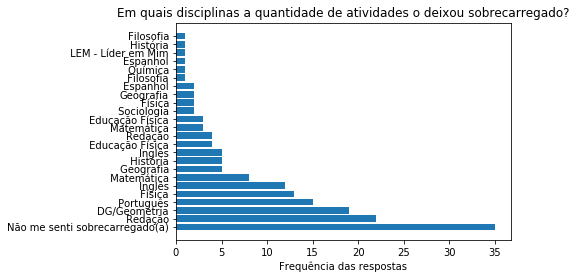

In [36]:
sobrecarga_labels = []
sobrecarga_values = []
for item in sobrecarga:
    sobrecarga_labels.append(item[0])
    sobrecarga_values.append(item[1])
    
plt.barh(sobrecarga_labels, sobrecarga_values)
plt.title('Em quais disciplinas a quantidade de atividades o deixou sobrecarregado?')
plt.xlabel('Frequência das respostas')
plt.show()